<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M6_AI1_GarciaCesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

In [50]:
!pip install catboost
!pip install category_encoders
import category_encoders as ce
from catboost import CatBoostRegressor, Pool

In [51]:
ruta = "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/act2_IMDb%20movies_ml.csv"
df = pd.read_csv(ruta,sep=";")

In [52]:
df.head(5)

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0010323,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,Werner Krauss,8.1,55601,7.99,$ 18000,$ 8811,237,160
1,tt0012190,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Rex Ingram,Pomeroy Cannon,7.2,3058,6.61,$ 800000,$ 9183673,45,16
2,tt0014624,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,Charles Chaplin,Edna Purviance,7.0,4735,6.61,$ 351000,$ 11233,37,24
3,tt0015864,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,Charles Chaplin,Charles Chaplin,8.2,97480,8.13,$ 923000,$ 26916,190,125
4,tt0018455,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,F.W. Murnau,George O'Brien,8.1,46069,7.97,$ 200000,$ 121107,250,186


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8664 non-null   object 
 1   original_title         8664 non-null   object 
 2   year                   8664 non-null   int64  
 3   genre                  8664 non-null   object 
 4   duration               8664 non-null   int64  
 5   country                8664 non-null   object 
 6   director               8664 non-null   object 
 7   actors                 8664 non-null   object 
 8   avg_vote               8664 non-null   float64
 9   votes                  8664 non-null   int64  
 10  avg_vote_weighted      8664 non-null   float64
 11  budget                 8664 non-null   object 
 12  worlwide_gross_income  8664 non-null   object 
 13  reviews_from_users     8664 non-null   int64  
 14  reviews_from_critics   8664 non-null   int64  
dtypes: f

In [ ]:
df['genre'].nunique()

In [ ]:
df['country'].nunique()

In [ ]:
df['actors'].nunique()

In [ ]:
df['director'].unique()

**Preprocesamiento de los datos**

In [54]:
# Eliminar el símbolo de dólar y convertir a enteros
df['budget'] = df['budget'].replace('[\$,]', '', regex=True).astype(float)
df['worlwide_gross_income'] = df['worlwide_gross_income'].replace('[\$,]', '', regex=True).astype(float)
df_copy = df.copy()

In [55]:
#categorical_cols = cols=['genre', 'country', 'director', 'actors']
# Aplicar Frequency Encoding
#for col in categorical_cols:
    #freq_encoding = df[col].value_counts() / len(df)
    #df[col + '_freq'] = df[col].map(freq_encoding)

# Convertir las variables categóricas en numéricas usando One-Hot Encoding
df = pd.get_dummies(df, columns=['genre', 'country', 'director', 'actors'])
# Cambiar valores booleanos a enteros en el DataFrame
df = df.astype(int, errors='ignore')

# Crear el codificador Binary
#binary_encoder = ce.BinaryEncoder(cols=['genre', 'country', 'director', 'actors'])

# Ajustar y transformar los datos
#df_encoded = binary_encoder.fit_transform(df)

Se hizo la prueba con 3 técnicas para convertir variables categóricas a numéricas, se realizó un frequency encoding sin embargo, se identifica que al ser muchas categorías únicas algunas frecuencias se repiten lo que podría significar en pérdida de información en el modelo, se realizó de igual manera un binary encoding pero se identifican problemas de interpretabilidad en el modelo, por último se realizó un one hot encoding, aunque se incrementa la dimensionalidad del dataset, se hicieron pruebas y aunque requiere más capacidad de procesamiento no es problema (se identifica que tarda mucho tiempo en iterar para encontrar los mejores hiperparámetros al usar grid_search, sin embargo, la interpretación es más sencilla)

In [56]:
df.head(5)

,imdb_title_id,original_title,year,duration,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,...,actors_Zooey Deschanel,actors_Zoë Poledouris,actors_Zsolt Nagy,actors_Ángel Tavira,actors_Émilie Dequenne,actors_Óscar Jaenada,actors_Özcan Deniz,actors_Özge Özberk,actors_Ümit Bülent Dinçer,actors_Þórhallur Sverrisson
0,tt0010323,Das Cabinet des Dr. Caligari,1920,76,8,55601,7,18000,8811,237,...,0,0,0,0,0,0,0,0,0,0
1,tt0012190,The Four Horsemen of the Apocalypse,1921,150,7,3058,6,800000,9183673,45,...,0,0,0,0,0,0,0,0,0,0
2,tt0014624,A Woman of Paris: A Drama of Fate,1923,82,7,4735,6,351000,11233,37,...,0,0,0,0,0,0,0,0,0,0
3,tt0015864,The Gold Rush,1925,95,8,97480,8,923000,26916,190,...,0,0,0,0,0,0,0,0,0,0
4,tt0018455,Sunrise: A Song of Two Humans,1927,94,8,46069,7,200000,121107,250,...,0,0,0,0,0,0,0,0,0,0


**Modelo para estimación de la recaudación de películas**

In [73]:
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
# Tarea: Estimación de la recaudación
#X = df[['duration','budget','genre_freq','country_freq','director_freq','actors_freq']]
X = df[['duration', 'budget'] + [col for col in df.columns if col.startswith('genre_') or col.startswith('country_') or col.startswith('director_') or col.startswith('actors_')]]
y = df['worlwide_gross_income']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Estimación de la recaudación - MSE: {mse}, R2: {r2}")

Estimación de la recaudación - MSE: 1.1931824994379762e+16, R2: 0.3622040852218995


La falta de especificación de hiperparámetros puede resultar en un modelo de árbol de decisión demasiado simple o no óptimo para los datos, lo que lleva a un rendimiento deficiente. En este caso es un elevado MSE y un bajo valor de R^2, a continuación, se procede a buscar la mejor alternativa para definir hiperparámetros y mejorar el rendimiento del modelo

El R^2 sin realizar cambios en los hiper

In [58]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  model.fit(X_train, y_train)

  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*model.score(X_train, y_train))
  score_test_list.append(100.0*model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

datos_modelo = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [59]:
datos_modelo.set_index("max_depth", inplace=True)

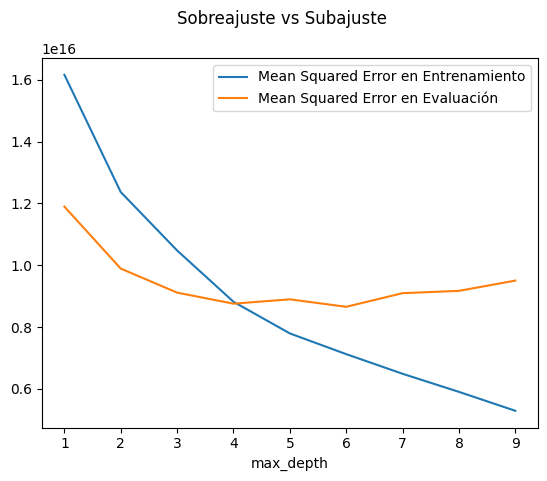

In [60]:
datos_modelo["mse_train"].plot(label="Mean Squared Error en Entrenamiento")
datos_modelo["mse_test"].plot(label="Mean Squared Error en Evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

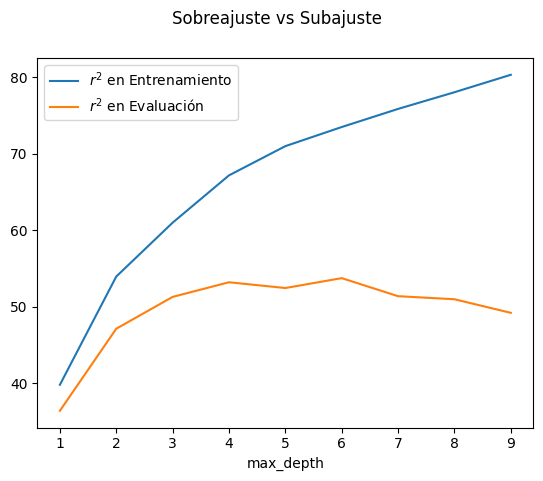

In [61]:
datos_modelo["score_train"].plot(label="$r^2$ en Entrenamiento")
datos_modelo["score_test"].plot(label="$r^2$ en Evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

In [62]:
# Definir la rejilla de parámetros a probar
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Crear el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Configurar la búsqueda de rejilla
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Ajustar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor R2 score: {grid_search.best_score_}")

Mejores hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mejor R2 score: 0.5584974341864969


Se ha utilizado grid search para encontrar los mejores hiperparámetros teniendo que la profundidad máxima del árbol debe ser 5 para evitar un sobreajuste del modelo, el número mínimo de muestras que debe tener un nodo hoja es 5, este valor ayuda a evitar que el árbol cree nodos con muy pocas muestras, lo que podría ser ruido. Un valor de 5 es una buena elección para evitar la fragmentación excesiva del árbol y por último, el número mínimo de muestras necesarias para dividir un nodo es 2, permite que el árbol haga splits siempre que haya al menos 2 muestras. Este es el valor mínimo posible y permite que el árbol se divida con mucha flexibilidad.

In [63]:
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
# Tarea: Estimación de la recaudación
#X = df[['duration','budget','genre_freq','country_freq','director_freq','actors_freq']]
X = df[['duration', 'budget'] + [col for col in df.columns if col.startswith('genre_') or col.startswith('country_') or col.startswith('director_') or col.startswith('actors_')]]
y = df['worlwide_gross_income']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42, max_depth = 5, max_features = None, min_samples_leaf = 5, min_samples_split = 2)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Estimación de la recaudación - MSE: {mse}, R2: {r2}")

Estimación de la recaudación - MSE: 9240182908636204.0, R2: 0.5060813485190625


In [64]:
# Identificar las columnas categóricas
categorical_features = ['genre', 'country', 'director', 'actors']

# Crear y preparar el dataset
X = df_copy[['duration', 'budget'] + categorical_features]
y = df_copy['worlwide_gross_income']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

model = CatBoostRegressor(random_seed=42, logging_level='Silent')
model.fit(train_pool)

# Realizar predicciones
y_pred = model.predict(test_pool)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Estimación de la recaudación - MSE: {mse}, R2: {r2}")

Estimación de la recaudación - MSE: 7590666345601426.0, R2: 0.5942535204842014


Se buscó otra alternativa de modelo para manejar las variables categóricas sin incrementar la dimensionalidad y se encontró que una opción es usar modelos CatBoostRegressor, los indicadores de R^2 y el MSE tienen una mejora en comparación con el modelo de árbol de decisión

**Modelo para estimación de media ponderada de votos**

In [75]:
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
# Tarea: Estimación de la recaudación
#X = df[['duration', 'budget','worlwide_gross_income','reviews_from_users','reviews_from_critics','genre_freq','country_freq','director_freq','actors_freq']]
X = df[['duration', 'budget','worlwide_gross_income','reviews_from_users','reviews_from_critics'] + [col for col in df.columns if col.startswith('genre_') or col.startswith('country_') or col.startswith('director_') or col.startswith('actors_')]]
y = df['avg_vote_weighted']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
# Crear y entrenar el modelo de árbol de decisión
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)

# Realizar predicciones
y_pred = model2.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Estimación de la recaudación - MSE: {mse}, R2: {r2}")

Estimación de la recaudación - MSE: 0.8346153846153846, R2: -0.038825026661089


La falta de especificación de hiperparámetros puede resultar en un modelo de árbol de decisión demasiado simple o no óptimo para los datos, lo que lleva a un rendimiento deficiente. En este caso es un elevado MSE y un bajo valor de R^2, a continuación, se procede a buscar la mejor alternativa para definir hiperparámetros y mejorar el rendimiento del modelo

In [66]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  model2 = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  model2.fit(X_train, y_train)

  pred_train = model2.predict(X_train)
  pred_test = model2.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*model2.score(X_train, y_train))
  score_test_list.append(100.0*model2.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

datos_modelo2 = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [67]:
datos_modelo2.set_index("max_depth", inplace=True)

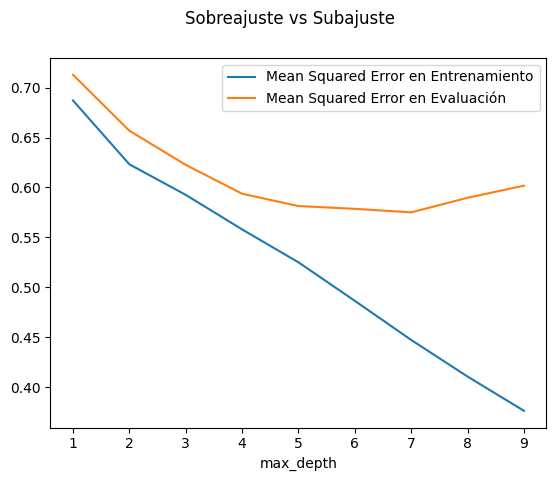

In [68]:
datos_modelo2["mse_train"].plot(label="Mean Squared Error en Entrenamiento")
datos_modelo2["mse_test"].plot(label="Mean Squared Error en Evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

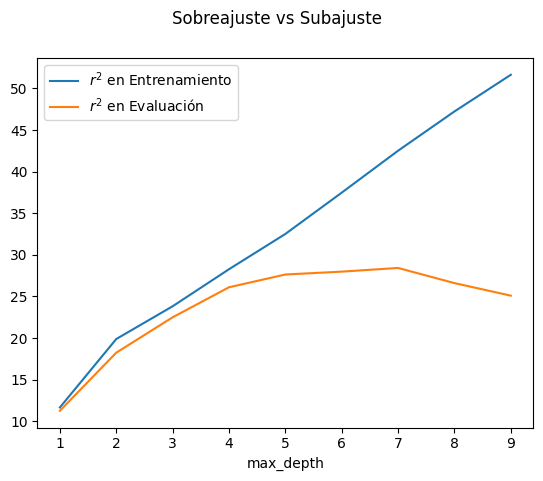

In [69]:
datos_modelo2["score_train"].plot(label="$r^2$ en Entrenamiento")
datos_modelo2["score_test"].plot(label="$r^2$ en Evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

In [70]:
# Definir la rejilla de parámetros a probar
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Crear el modelo de árbol de decisión
model2 = DecisionTreeRegressor(random_state=42)

# Configurar la búsqueda de rejilla
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='r2')

# Ajustar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor R2 score: {grid_search.best_score_}")

Mejores hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mejor R2 score: 0.264933492533051


Se ha utilizado grid search para encontrar los mejores hiperparámetros teniendo que la profundidad máxima del árbol debe ser 5 para evitar un sobreajuste del modelo, el número mínimo de muestras que debe tener un nodo hoja es 5, este valor ayuda a evitar que el árbol cree nodos con muy pocas muestras, lo que podría ser ruido. Un valor de 5 es una buena elección para evitar la fragmentación excesiva del árbol y por último, el número mínimo de muestras necesarias para dividir un nodo es 2, permite que el árbol haga splits siempre que haya al menos 2 muestras. Este es el valor mínimo posible y permite que el árbol se divida con mucha flexibilidad.

In [71]:
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
# Tarea: Estimación de la recaudación
#X2 = df[['duration', 'budget','worlwide_gross_income','reviews_from_users','reviews_from_critics','genre_freq','country_freq','director_freq','actors_freq']]
X2 = df[['duration', 'budget','worlwide_gross_income','reviews_from_users','reviews_from_critics'] + [col for col in df.columns if col.startswith('genre_') or col.startswith('country_') or col.startswith('director_') or col.startswith('actors_')]]
y2 = df['avg_vote_weighted']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model2 = DecisionTreeRegressor(random_state=42, max_depth = 5, max_features = None, min_samples_leaf = 5, min_samples_split = 2)
model2.fit(X_train, y_train)

# Realizar predicciones
y_pred = model2.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Estimación de la recaudación - MSE: {mse}, R2: {r2}")

Estimación de la recaudación - MSE: 0.5777370350081413, R2: 0.2809050709363501


In [72]:
# Identificar las columnas categóricas
categorical_features = ['genre', 'country', 'director', 'actors']

# Crear y preparar el dataset
X2 = df_copy[['duration', 'budget','worlwide_gross_income','reviews_from_users','reviews_from_critics'] + categorical_features]
y2 = df_copy['avg_vote_weighted']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

model2 = CatBoostRegressor(random_seed=42, logging_level='Silent')
model2.fit(train_pool)

# Realizar predicciones
y_pred = model2.predict(test_pool)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Estimación de la recaudación - MSE: {mse}, R2: {r2}")

Estimación de la recaudación - MSE: 0.3409414371102469, R2: 0.529548513108216


Se buscó otra alternativa de modelo para manejar las variables categóricas sin incrementar la dimensionalidad y se encontró que una opción es usar modelos CatBoostRegressor, los indicadores de R^2 y el MSE tienen una mejora en comparación con el modelo de árbol de decisión